# 0. Instalación de Keras y Tensorflow




## Tensorflow
Para instalar tensorflow en python, hay que elegir si se va autilizar GPU (aumentará la velocidad de estimación) o no:

### GPU

```
pip install --upgrade tensorflow-gpu
```

### Sin GPU

```
pip install --upgrade tensorflow
```
```
Collecting tensorflow
  Downloading https://files.pythonhosted.org/packages/05/cd/c171d2e33c0192b04560ce864c26eba83fed888fe5cd9ded661b2702f2ae/tensorflow-1.12.0-cp36-cp36m-win_amd64.whl (45.9MB)
    100% |████████████████████████████████| 45.9MB 425kB/s

    ----
    Successfully installed absl-py-0.7.0 astor-0.7.1 gast-0.2.2 grpcio-1.18.0 h5py-2.9.0 keras-applications-1.0.6 keras-preprocessing-1.0.5 markdown-3.0.1 numpy-1.16.0 protobuf-3.6.1 six-1.12.0 tensorboard-1.12.2 tensorflow-1.12.0 termcolor-1.1.0 werkzeug-0.14.1

```

In [0]:
# pip install --upgrade tensorflow
# pip install --upgrade tensorflow-gpu

```
pip install --upgrade tensorflow
Collecting tensorflow
  Downloading https://files.pythonhosted.org/packages/05/cd/c171d2e33c0192b04560ce864c26eba83fed888fe5cd9ded661b2702f2ae/tensorflow-1.12.0-cp36-cp36m-win_amd64.whl (45.9MB)
    100% |████████████████████████████████| 45.9MB 425kB/s
    
    ----
    Successfully installed absl-py-0.7.0 astor-0.7.1 gast-0.2.2 grpcio-1.18.0 h5py-2.9.0 keras-applications-1.0.6 keras-preprocessing-1.0.5 markdown-3.0.1 numpy-1.16.0 protobuf-3.6.1 six-1.12.0 tensorboard-1.12.2 tensorflow-1.12.0 termcolor-1.1.0 werkzeug-0.14.1
```



In [0]:
import tensorflow

## Keras
Actualmente, keras viene distribuido dentro de tensorflow (tensorflor.keras), pero se puede instalar como pun paquete aparte.

```
pip install keras
```


```

Collecting keras

  Downloading https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl (312kB)
    100% |████████████████████████████████| 317kB 1.9MB/s
    
```


Pare verificar la instalación de Keras, imprimir por pantalla el archivo ~/.keras/keras.json



```
cat ~/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}

```

Verificar los siguientes campos

```
"backend": "tensorflow"
 "image_data_format": "channels_last"
 ```


In [3]:
import keras

Using TensorFlow backend.


# 1. Regresión Lineal
La relacion entre la variable dependiente $y$ y la variable independiente $X_1$ depende linealmente sólo del parámetro $\omega_1$ (la pendiente de la recta) y empieza en $cte.$

$y=\omega_1 · X_1 + cte.$

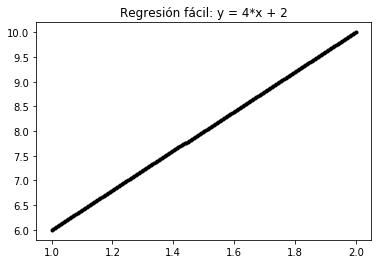

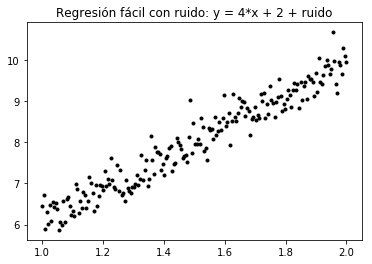

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

# Los valores reales de la regresión
omega = 4
cte = 2

# Los valores de X
x = np.linspace(1,2,200)

#Calculamos los valores de y
y = x*omega  + cte

#Imprimimos
plt.plot(x , y, 'k.')
plt.title(f"Regresión fácil: y = {omega}*x + {cte}")
plt.show()


# Lo ponemos un poco más difícil, movemos un poco los valores
ruido = np.random.randn(*x.shape) * 0.3
y = x*omega  + cte + ruido

#Imprimimos de nuevo
plt.plot(x , y, 'k.')
plt.title(f"Regresión fácil con ruido: y = {omega}*x + {cte} + ruido")
plt.show()

## Red Neuronal estimando una regresión lineal


$$X_1 ---->(w_1)_{neurona}---->y\\
/_{bias}$$




#### Queremos estimar:


* **El parámetro $\omega$**: Nuestra red neuronal sólo necesita una neurona, cuya entrada sean las $x_1$ y la salida vaya en el rango de los reales
* **La $cte.$**: Se estimará un parámetro bias (lo veremos maś adelante en el curso)



In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

 
# Creamos la red neuronal
model = Sequential()

# Añadimos la Neurona, que está en una capa densa, con sólo una entrada (el 
# parámetro) y la activación lineal devuelve el rango de reales
model.add(Dense(1, input_dim=1, use_bias=True, activation='linear'))

print(model.summary())



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#La red ha inicializado los parámetros
weights = model.layers[0].get_weights()
print(weights)

w_init = weights[0][0][0]
b_init = weights[1][0]
print('\nModelo de regresio lineal inicializado con w: %.2f, b: %.2f' % (w_init, b_init))


[array([[-0.5161629]], dtype=float32), array([0.], dtype=float32)]

Modelo de regresio lineal inicializado con w: -0.52, b: 0.00


## Entrenamiento
### Optimizador

Para estimar los parámetros utilizaremos:
* **Un optimizador**:  Algoritmo para encontrar los pesos en función del error a minimizar
* **Un Error**: Cómo mediremos el error

En nuestro ejemplo, utilizaremos el método del gradiente como optimizador y el error cuadrático medio como error.


In [0]:
# Definimos el optimizador y la métrica del error
# sgd: Stochastic gradient descent
 
model.compile(optimizer='sgd', loss='mean_squared_error')

### Entrenamiento

Para el entrenamiento, hay que darle al optimizador:
* **Los datos originales**: x e y.
* **batch_size**: Número de registros para cada paso del gradiente
* **epochs**: el número de vueltas sobre todo el dataset

In [8]:
model.fit(x,y, batch_size=1, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
200/200 [==============================] - 1s 5ms/step - loss: 3.1812
Epoch 2/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0961
Epoch 3/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0958
Epoch 5/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0946
Epoch 6/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 7/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0913
Epoch 8/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0932
Epoch 9/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0918
Epoch 10/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0913
Epoch 11/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0902
Epoch 12/30
200/200 [==============================] - 0s 1


Modelo de regresion lineal estimado con:
w: 3.80 (Objetivo: 4.00)
b: 2.27 (Objetivo: 2.00)


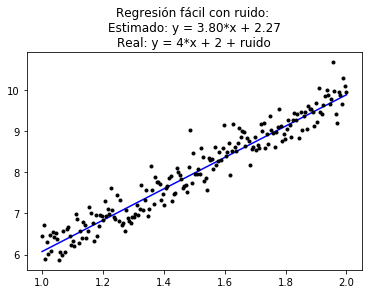

In [9]:
#Veamos el resultado

weights = model.layers[0].get_weights()
w_final = weights[0][0][0]
b_final = weights[1][0]
print("""\nModelo de regresion lineal estimado con:
w: %.2f (Objetivo: %.2f)
b: %.2f (Objetivo: %.2f)""" % (w_final,omega, b_final, cte))

# Veamos la predicción
predict = model.predict(x)

plt.plot(x, predict, 'b', x , y, 'k.')
plt.title(f"Regresión fácil con ruido: \nEstimado: y = {w_final:.2f}*x + {b_final:.2f}\nReal: y = {omega}*x + {cte} + ruido")
plt.show()

## EJERCICIO
Estimación con dos partametros: 
$y=\omega_1 · X_1 + \omega_2 · X_2 + cte.$








# MNIST con densas

El problema ahora es identificar los números escritos a mano.

In [10]:
from keras.datasets import mnist
import keras.utils.np_utils as np_utils
import numpy as np
import matplotlib.pyplot as plt 


(X_train, y_train), (X_test, y_test) = mnist.load_data()




11493376/11490434 [==============================] - 0s 0us/step


X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
Distribución de número en train: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Número: 0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54

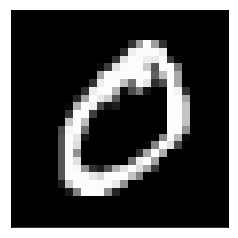

In [11]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

print("Distribución de número en train:", np.unique(y_train, return_counts=True))

idx=1


fig = plt.figure()
plt.imshow(X_train[idx], cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
fig


print(f"Número: {y_train[idx]}")

np.set_printoptions(linewidth=200)
print(X_train[idx,:,:])


Introducimos en la red neuronal la imagen en una dimensión

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
np.set_printoptions(linewidth=200)
print(X_train[idx,:])

print("Train forma:", X_train.shape)
print("Test forma:", X_test.shape)


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  48. 238.
 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54. 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.
   0.   0.   0.   0.

Ayudamos a la red neuronal normalizando los datos

In [0]:
# Ayudamos normalizando los datos
X_train /= 255
X_test /= 255

Como resultado tenemos una columna con números del 0 al 9, pero queremos que la red neuronal nos devuelva la probabilidad de ser cada uno de los números, por lo tanto, necesitamos 10 columnas.

In [14]:
n_classes = 10
print("Forma antes del one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Forma después del one-hot encoding: ", Y_train.shape)

print(y_train[idx])
print(Y_train[idx])

print("\n")
print(y_train[idx+1])
print(Y_train[idx+1])

Forma antes del one-hot encoding:  (60000,)
Forma después del one-hot encoding:  (60000, 10)
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Construyendo el modelo


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
___________________________

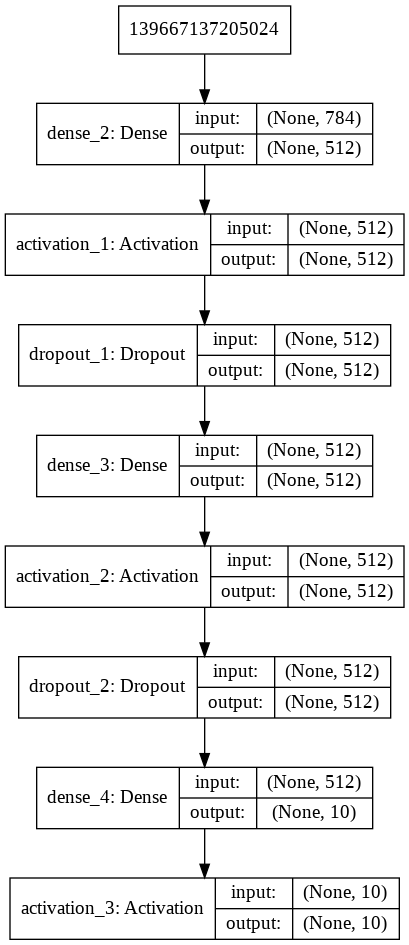

In [16]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='mnist_lin.png')
from IPython.display import Image
Image(retina=True, filename='mnist_lin.png')

## Entrenamiento
### Optimizador

El error que necesitamos ahora es el *categorical cross entropy*

#### Adam
Es una mejora en velocidad de dos técnicas para mejorar el método del gradiente:

* *Root Mean Square Propagation (RMSProp)*: Learning rate para cada parámetro según la media de los valores vistos. **Adam utiliza también valores al cuadrado**
* *Adaptive Gradient Algorithm (AdaGrad)*: Learning rate para cada parámetro según lo enfrentado: actualiza poco lo visto con frecuencia y mucho lo no visto. Para problemas *Sparse *

En concreto, utiliza una media móvil exponencial del gradiente y del gradiente al cuadrado ($\beta_1$ y $\beta_2$ controlan el valor de cada media movil)



In [0]:

model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')


### Entrenamiento


In [18]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2490 - categorical_accuracy: 0.9266 - val_loss: 0.1183 - val_categorical_accuracy: 0.9637
Epoch 2/20
 - 3s - loss: 0.1034 - categorical_accuracy: 0.9682 - val_loss: 0.0940 - val_categorical_accuracy: 0.9687
Epoch 3/20
 - 3s - loss: 0.0715 - categorical_accuracy: 0.9770 - val_loss: 0.0798 - val_categorical_accuracy: 0.9769
Epoch 4/20
 - 3s - loss: 0.0549 - categorical_accuracy: 0.9830 - val_loss: 0.0701 - val_categorical_accuracy: 0.9793
Epoch 5/20
 - 3s - loss: 0.0469 - categorical_accuracy: 0.9848 - val_loss: 0.0815 - val_categorical_accuracy: 0.9765
Epoch 6/20
 - 3s - loss: 0.0395 - categorical_accuracy: 0.9873 - val_loss: 0.0651 - val_categorical_accuracy: 0.9811
Epoch 7/20
 - 3s - loss: 0.0347 - categorical_accuracy: 0.9885 - val_loss: 0.0674 - val_categorical_accuracy: 0.9814
Epoch 8/20
 - 2s - loss: 0.0310 - categorical_accuracy: 0.9901 - val_loss: 0.0709 - val_categorical_accuracy: 0.9809
Epoch 9/20
 - 

## Guardar un modelo
Para no tener que estimar cada vez el modelo, éste se puede guardar en un fichero para ser recuperado después




In [19]:
model_name = 'keras_mnist.h5'
model.save(model_name)
print(f"Modelo guardado en {model_name}")

Modelo guardado en keras_mnist.h5


## Cargar un modelo
Para recuperar de un archivo

In [20]:
from keras.models import load_model
mnist_model = load_model("keras_mnist.h5")
print(mnist_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
__________

## Evaluación
Probamos el modelo con los datos de test


In [21]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.06589578364602784
Test Accuracy 0.985


In [22]:
#Una prediccion:
predicted_probs = mnist_model.predict_proba(X_test)
print(predicted_probs[0])


predicted_values = mnist_model.predict(X_test)
print(predicted_values[0])

predicted_classes = mnist_model.predict_classes(X_test)
print(predicted_classes[0])

[2.8259096e-14 2.5154787e-10 1.7141756e-16 2.7961195e-15 1.2351243e-12 6.0363121e-17 5.3495669e-18 1.0000000e+00 1.2263139e-17 1.9285915e-11]
[2.8259096e-14 2.5154787e-10 1.7141756e-16 2.7961195e-15 1.2351243e-12 6.0363121e-17 5.3495669e-18 1.0000000e+00 1.2263139e-17 1.9285915e-11]
7


Vamos a definir una función para pintar los aciertos y los errores con sus números

In [0]:
def pintar_9_numeros(predicted_classes, X_test, y_test,use_indices,cmap):
  # Reducimos el tamaño para que quepan los subplots
  plt.rcParams['figure.figsize'] = (8,8)
  plt.style.use('dark_background')

  figure_evaluation = plt.figure()

  # pintar 9 graficos
  for i, use in enumerate(use_indices[:9]):
      plt.subplot(3,3,i+1)
      plt.imshow(X_test[use].reshape(28,28), cmap=cmap, interpolation='none')
      plt.title(
        "Predicción: {}, Verdad: {}".format(predicted_classes[use],
                                          y_test[use]))
      plt.xticks([])
      plt.yticks([])
      
  figure_evaluation
  
  
def pintar_predicciones(mnist_model,X_test,y_test):  
  predicted_classes = mnist_model.predict_classes(X_test)
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
  print()
  print(len(correct_indices)," bien clasificados")
  print(len(incorrect_indices)," mal clasificados")
  
  pintar_9_numeros(predicted_classes, X_test, y_test,correct_indices,'Greens')
  pintar_9_numeros(predicted_classes, X_test, y_test,incorrect_indices,'Oranges')
  


  



9850  bien clasificados
150  mal clasificados


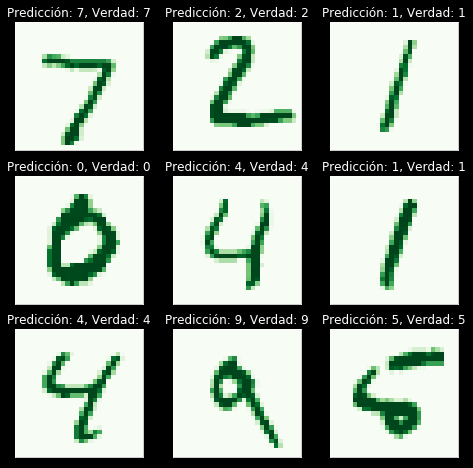

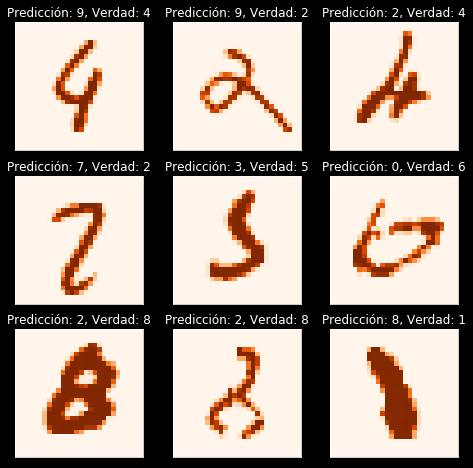

In [24]:
pintar_predicciones(mnist_model,X_test,y_test) 

# MNIST convolutional

## Construyendo el modelo

Preparamos los datos

In [25]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12


# Cargamos los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dimensiones de la imagen
img_rows, img_cols = 28, 28

# Las imágenes se pueden cargar con el color primero o con el color al final
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
#Convertimos a float y ayudamos normalizando los valores    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Convertimos los valores en one hot encoder

In [26]:


Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

print("Valor inicial: ", y_train[0])
print("Valor tratado: ", Y_train[0])


Valor inicial:  5
Valor tratado:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Definimos la red convolucional
Tamaños de entrada
$$
\tfrac{
\underset{imagen}{28
\overset{28}{
  \begin{bmatrix}
  . & . & . \\
  . & . & . \\
  . & .  & .
  \end{bmatrix} 
}}
\times
\underset{filter \times 32}{
3\overset{3}{
  \begin{bmatrix}
  . 
  \end{bmatrix} 
}}
}{Conv2D} 
---->
\tfrac{
26
\overset{26}{
  \begin{bmatrix}
  . & . & . \\
  . & . & . \\
  . & .  & .
  \end{bmatrix} 
}
\times
\underset{filter \times 64}{
3\overset{3}{
  \begin{bmatrix}
  . 
  \end{bmatrix} 
}}
}{Conv2D} 
---->
\tfrac{
24
\overset{24}{
  \begin{bmatrix}
  . & . & . \\
  . & . & . \\
  . & .  & .
  \end{bmatrix} 
}
\times
\underset{filter}{
2\overset{2}{
  \begin{bmatrix}
  . 
  \end{bmatrix} 
}}
}{Max}
---->
\tfrac{
12
\overset{12}{
  \begin{bmatrix}
  . & . & . \\
  . & . & . \\
  . & .  & .
  \end{bmatrix} 
}
}{Dropout_{regularización}} 
 ---->\tfrac{
12
\overset{12}{
  \begin{bmatrix}
  . & . & . \\
  . & . & . \\
  . & .  & .
  \end{bmatrix} 
}
}{Flatten}
 ---->\tfrac{
\overset{9216=12\times 12\times 64}{
  \begin{bmatrix}
  . & . & . 
  \end{bmatrix} 
}\times(128)
}{Densa}
 ---->\tfrac{
\overset{128}{
  \begin{bmatrix}
  . & . & . 
  \end{bmatrix} 
}
}{Dropout}
 ---->\tfrac{
\overset{128}{
  \begin{bmatrix}
  . & . & . 
  \end{bmatrix} 
}
}{Salida}---->
\overset{10}{
  \begin{bmatrix}
  . & . & . 
  \end{bmatrix} 
}
$$



In [27]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, Y_test))
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.2677 - acc: 0.9165 - val_loss: 0.0528 - val_acc: 0.9836
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0885 - acc: 0.9739 - val_loss: 0.0415 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.0631 - acc: 0.9809 - val_loss: 0.0379 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.0528 - acc: 0.9845 - val_loss: 0.0320 - val_acc: 0.9900
Epoch 5/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.0471 - acc: 0.9856 - val_loss: 0.0314 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.0418 - acc: 0.9871 - val_loss: 0.0318 - val_acc: 0.9888
Epoch 7/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0373 - acc: 0.9891 - val_loss: 0.0315 -


9923  bien clasificados
77  mal clasificados


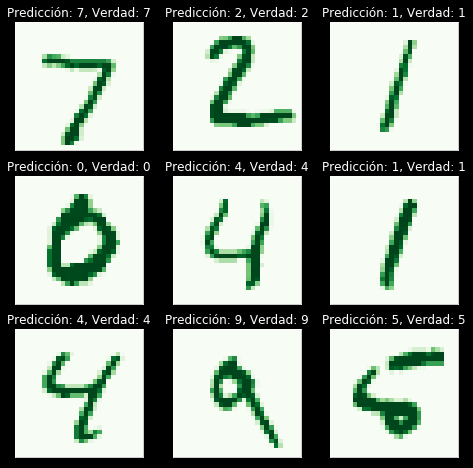

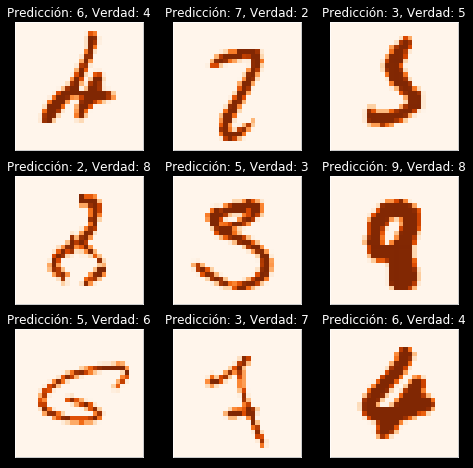

In [29]:
pintar_predicciones(model,x_test, y_test)